In [1]:
import math
from math import pi, pow, sin, cos, asin, sqrt, floor
from scipy import stats
import numpy as np
from pyproj import Proj
from itertools import chain, combinations
import pulp
import networkx as nx



In [2]:
NJ_neighbour_counties_data = {
    "Atlantic": ["Atlantic", "Burlington", "Camden", "Cape May", "Cumberland", "Gloucester", "Ocean"],
    "Bergen": ["Bergen", "Essex", "Hudson", "Passaic"],
    "Burlington": ["Burlington", "Atlantic", "Camden", "Mercer", "Monmouth", "Ocean"],
    "Camden": ["Camden", "Atlantic", "Burlington", "Gloucester"],
    "Cape May": ["Cape May", "Atlantic", "Cumberland"],
    "Cumberland": ["Cumberland", "Atlantic", "Cape May", "Gloucester", "Salem"],
    "Essex": ["Essex", "Bergen", "Hudson", "Morris", "Passaic", "Union"],
    "Gloucester": ["Gloucester", "Atlantic", "Camden", "Cumberland", "Salem"],
    "Hudson": ["Hudson", "Bergen", "Essex", "Union"],
    "Hunterdon": ["Hunterdon", "Mercer", "Morris", "Somerset", "Warren"],
    "Mercer": ["Mercer", "Burlington", "Hunterdon", "Middlesex", "Monmouth", "Somerset"],
    "Middlesex": ["Middlesex", "Mercer", "Monmouth", "Somerset", "Union"],
    "Monmouth": ["Monmouth", "Burlington", "Mercer", "Middlesex", "Ocean"],
    "Morris": ["Morris", "Essex", "Hunterdon", "Passaic", "Somerset", "Sussex", "Union", "Warren"],
    "Ocean": ["Ocean", "Atlantic", "Burlington", "Monmouth"],
    "Passaic": ["Passaic", "Bergen", "Essex", "Morris", "Sussex"],
    "Salem": ["Salem", "Cumberland", "Gloucester"],
    "Somerset": ["Somerset", "Hunterdon", "Mercer", "Middlesex", "Morris", "Union"],
    "Sussex": ["Sussex", "Morris", "Passaic", "Warren"],
    "Union": ["Union", "Essex", "Hudson", "Middlesex", "Morris", "Somerset"],
    "Warren": ["Warren", "Hunterdon", "Morris", "Sussex"]
}

NJ_county_coordinates = {
    'Atlantic': (39.4754, -74.6474),
    'Bergen': (40.9590, -74.0715),
    'Burlington': (39.9090, -74.8270),
    'Camden': (39.8010, -74.9650),
    'Cape May': (39.1406, -74.8011),
    'Cumberland': (39.3700, -75.1115),
    'Essex': (40.7870, -74.2602),
    'Gloucester': (39.7173, -75.1247),
    'Hudson': (40.7282, -74.0776),
    'Hunterdon': (40.5707, -74.9437),
    'Mercer': (40.2804, -74.7110),
    'Middlesex': (40.4384, -74.4149),
    'Monmouth': (40.3020, -74.2449),
    'Morris': (40.8602, -74.5522),
    'Ocean': (39.9659, -74.2905),
    'Passaic': (40.9493, -74.2129),
    'Salem': (39.5793, -75.4110),
    'Somerset': (40.5652, -74.6705),
    'Sussex': (41.1289, -74.6918),
    'Union': (40.6595, -74.3089),
    'Warren': (40.8568, -75.0027)
}


NJ_county_population = {
    'Atlantic': 274534,
    'Bergen': 955732,
    'Burlington': 461860,
    'Camden': 523485,
    'Cape May': 95263,
    'Cumberland': 154152,
    'Essex': 863728,
    'Gloucester': 302294,
    'Hudson': 724854,
    'Hunterdon': 128947,
    'Mercer': 387340,
    'Middlesex': 863162,
    'Monmouth': 643615,
    'Morris': 509285,
    'Ocean': 637229,
    'Passaic': 524118,
    'Salem': 64837,
    'Somerset': 345361,
    'Sussex': 144221,
    'Union': 575345,
    'Warren': 109632
}

NJ_county_white_population = {
    'Atlantic': 156796,
    'Bergen': 543849,
    'Burlington': 303024,
    'Camden': 293198,
    'Cape May': 81536,
    'Cumberland': 74606,
    'Essex': 261487,
    'Gloucester': 230313,
    'Hudson': 248561,
    'Hunterdon': 106790,
    'Mercer': 178447,
    'Middlesex': 361742,
    'Monmouth': 476056,
    'Morris': 354824,
    'Ocean': 534036,
    'Passaic': 229573,
    'Salem': 46600,
    'Somerset': 185499,
    'Sussex': 121879,
    'Union': 236589,
    'Warren': 86875
}

In [3]:
# List of all counties
counties = sorted(NJ_neighbour_counties_data.keys())


In [4]:
# Sort the dictionary by values in ascending order
sorted_counties = sorted(NJ_county_population.items(), key=lambda x: x[1])
sorted_counties


[('Salem', 64837),
 ('Cape May', 95263),
 ('Warren', 109632),
 ('Hunterdon', 128947),
 ('Sussex', 144221),
 ('Cumberland', 154152),
 ('Atlantic', 274534),
 ('Gloucester', 302294),
 ('Somerset', 345361),
 ('Mercer', 387340),
 ('Burlington', 461860),
 ('Morris', 509285),
 ('Camden', 523485),
 ('Passaic', 524118),
 ('Union', 575345),
 ('Ocean', 637229),
 ('Monmouth', 643615),
 ('Hudson', 724854),
 ('Middlesex', 863162),
 ('Essex', 863728),
 ('Bergen', 955732)]

# Metrics

In [5]:

# Sort the dictionary by values in ascending order
sorted_counties = sorted(NJ_county_population.items(), key=lambda x: x[1])

# Initialize variables
cumulative_sum = 0
top_county_size = sorted_counties[-1][1]
max_counties_count = 0

# Iterate through the sorted counties and find the point where the cumulative sum is greater than or equal to the top county size
for county, population in sorted_counties:
    cumulative_sum += population
    max_counties_count += 1
    if cumulative_sum >= top_county_size:
        break

print(f"The sum of the lowest {max_counties_count} counties is greater than or equal to the size of the top one at {county} with a population of {cumulative_sum}.")


The sum of the lowest 7 counties is greater than or equal to the size of the top one at Atlantic with a population of 971586.


In [6]:

NJ_Population = sum(list(NJ_county_population.values()))
NJ_w_Population = sum(list(NJ_county_white_population .values()))
NJ_legislative_districts = 12
NJ_Counties = 21
NJ_w_Population_p = NJ_w_Population/NJ_Population
NJ_w_Population_p_max = NJ_w_Population_p + .10  # average + 10%



dist_pop_goal =int(NJ_Population/NJ_legislative_districts)


print(f'{NJ_Population} Max population')
print(f'{NJ_w_Population} white population')
print(f'{NJ_w_Population_p_max}white population max %')


print(f'{dist_pop_goal} population goal')
print(f'{NJ_Counties} number of counties ')
print(f'{NJ_legislative_districts} number of districts')
print(f'{max_counties_count} max number of counties per district')



9288994 Max population
5112280 white population
0.6503588440255209white population max %
774082 population goal
21 number of counties 
12 number of districts
7 max number of counties per district


In [7]:
# Filter counties with populations greater than the goaL
Single_counties = {county: population for county, population in NJ_county_population.items() if population > dist_pop_goal}

print(Single_counties)
len(Single_counties)

{'Bergen': 955732, 'Essex': 863728, 'Middlesex': 863162}


3

## Calculations
Theoretical maximum numnmber of counties per district is 7, however solution converges at 5 anything higher makes the code take longer to run

In [8]:
min_len = 1
max_len = 5 #can use max_counties_count 
possible_districts = list(chain.from_iterable(combinations(counties, i) for i in range(min_len, max_len+1)))

print(len(possible_districts))

27895


In [9]:
# Initialize a matrix with all zeros
matrix_size = len(counties)
county_matrix = [[0] * matrix_size for _ in range(matrix_size)]

# Populate the matrix based on the neighbor information
for i, county in enumerate(counties):
    neighbors = NJ_neighbour_counties_data[county]
    for neighbor in neighbors:
        j = counties.index(neighbor)
        county_matrix[i][j] = 1

# Print the matrix
for row in county_matrix:
    print(row)

[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

## Find the index of the posible solutions

In [10]:
index_sols = []

for solution in possible_districts:
    if isinstance(solution, tuple): 
        # If the entry is a tuple, find the index for each element and append
        indices = [counties.index(elem) for elem in solution]
        index_sols.append(tuple(indices))
    else:
        # If the entry is a string, find its index and append
        index = counties.index(solution)
        index_sols.append(index)

        
len(index_sols)

27895

### Connected counties in the possible solutions


In [11]:
#all have to be connected
solutions = []

# Iterate through all possible combinations of indices in index_sol1
for indices in index_sols:
    for combo in combinations(indices, min(len(indices), len(indices))):
        if len(combo) == 1 or all(county_matrix[i][j] != 0 for i, j in combinations(combo, 2)):
            solutions.append(combo)
        else:
            break  # at least one county is isolated from the rest            
                
len(solutions)

85

In [12]:
#Hall counties have to be connected by at least another county to the rest
"""
solutions = []
G = nx.Graph()
G.add_nodes_from(range(len(county_matrix)))

edges = [(i, j) for i in range(len(county_matrix)) for j in range(len(county_matrix)) if county_matrix[i][j] != 0]
G.add_edges_from(edges)

# Iterate through all possible combinations of indices in index_sols
for indices in index_sols:
    for combo in combinations(indices, min(len(indices), len(indices))):
        subgraph = G.subgraph(combo)
        if len(combo) == 1 or nx.is_connected(subgraph):
            solutions.append(combo)
        else:
            break  # at least one county is isolated from the rest

# Print the number of solutions
print(len(solutions))"""


'\nsolutions = []\nG = nx.Graph()\nG.add_nodes_from(range(len(county_matrix)))\n\nedges = [(i, j) for i in range(len(county_matrix)) for j in range(len(county_matrix)) if county_matrix[i][j] != 0]\nG.add_edges_from(edges)\n\n# Iterate through all possible combinations of indices in index_sols\nfor indices in index_sols:\n    for combo in combinations(indices, min(len(indices), len(indices))):\n        subgraph = G.subgraph(combo)\n        if len(combo) == 1 or nx.is_connected(subgraph):\n            solutions.append(combo)\n        else:\n            break  # at least one county is isolated from the rest\n\n# Print the number of solutions\nprint(len(solutions))'

In [13]:
#rewrite indexes into solutions

result = []

for index in solutions:
    names = tuple(counties[i] for i in index)
    result.append(names)


## calculate the total population for the solution being evaluated

In [14]:
def total_pop(district):
    pop_list = [NJ_county_population[county] for county in district]
    population = sum(pop_list)
    return population

## Objective Fuction
 weighted sum of the distances between the population of each district and the average population

In [15]:
import pulp


# Create a binary variable to state that a district is used
x = pulp.LpVariable.dicts('district', result, lowBound=0, upBound=1, cat=pulp.LpInteger)

# Define the objective function: minimize the sum of distances from the average population
redistrict_model = pulp.LpProblem("Redistricting Model", pulp.LpMinimize)

#specify the maximum number of districts
redistrict_model += sum([x[district] for district in result]) == NJ_legislative_districts

# A county can be assigned to one and only one district
for county in counties:
    redistrict_model += sum([x[district] for district in result if county in district]) == 1


# minimize the distance between selected models and the average population
redistrict_model += sum([x[district] * abs(total_pop(district) - dist_pop_goal) for district in result]), "Objective"
# Solve the model
redistrict_model.solve()

# Print the chosen districts
count_districts = 0
print("The chosen districts are out of a total of %s:" % len(result))

finalsolution = []
for district in result:
    if x[district].value() == 1.0:
        count_districts += 1
        finalsolution.append(district)
        print(district, total_pop(district))

print("Number of chosen districts:", count_districts)


The chosen districts are out of a total of 85:
('Bergen',) 955732
('Essex',) 863728
('Hudson',) 724854
('Middlesex',) 863162
('Ocean',) 637229
('Burlington', 'Camden') 985345
('Gloucester', 'Salem') 367131
('Mercer', 'Monmouth') 1030955
('Passaic', 'Sussex') 668339
('Somerset', 'Union') 920706
('Atlantic', 'Cape May', 'Cumberland') 523949
('Hunterdon', 'Morris', 'Warren') 747864
Number of chosen districts: 12


C:\Users\logic\anaconda3\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


C:\Users\logic\anaconda3\Lib\site-packages\geopandas\plotting.py:819: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


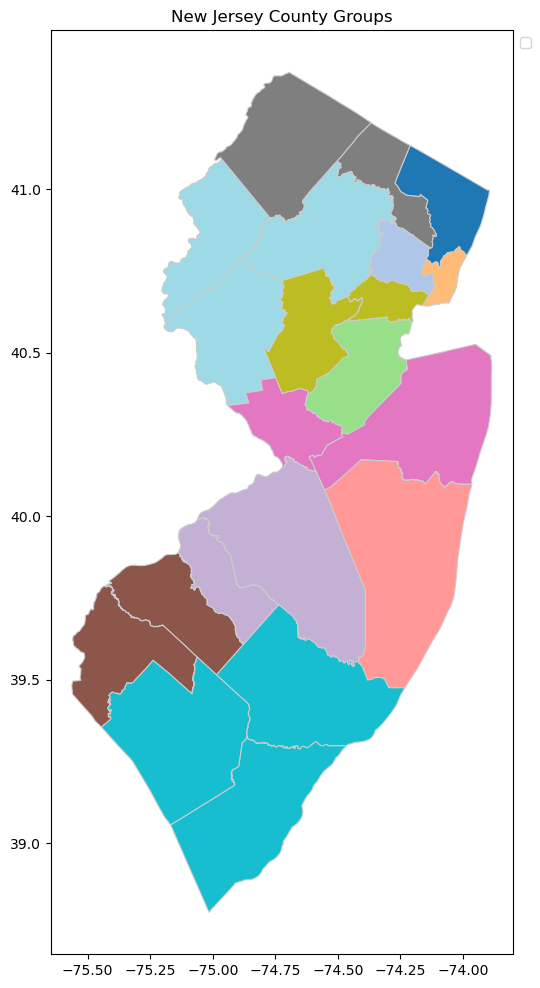

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_file = "nj-county-boundaries.geojson"
counties = gpd.read_file(geojson_file)

# Define the county groups

county_groups =  finalsolution

# Create a new column in the GeoDataFrame to store group information
counties['group'] = None

# Assign groups to each county
for group_idx, counties_in_group in enumerate(county_groups):
    counties.loc[counties['name'].isin(counties_in_group), 'group'] = group_idx

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))
counties.plot(column='group', cmap='tab20', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the legend
legend_labels = [f"Group {i+1}: {', '.join(groups)}" for i, groups in enumerate(county_groups)]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Set plot title
plt.title('New Jersey County Groups')

# Display the map
plt.show()
